# Chapter17. 딥러닝을 이용한 자연어 처리

자연어 : 일상생활에서 사용하는 언어<br>
인공어 : 프로그래밍 언어

자연어 처리란 컴퓨터가 자연어를 처리한다는 인공지능의 한 분야이다. 예를들어 음성인식, 감성분석, 번역시스템, 텍스트분류, 질의응답시스템, 챗봇 등이 있다.

#### (1) 텍스트 토큰화

'나는 오늘 학교에 간다'<br>

나는/오늘/학교에/간다<br>

텍스트를 '토큰'이라 불리는 단위로 나누는 작업을 토큰화라고 한다. 단어를 기준으로 쪼개는것을 단어토큰화, 문장을 기준으로 쪼개면 문장토큰화라고 한다.



##### 토큰화 도구 text_to_word_sequence()

텍스트를 단어 단위로 쪼개어 시퀀스를 생성한다.<br>
1. 단어를 공백으로 나눈다.<br>
2. 구두점을 제거한다. 단 (') 는 제거 안함<br>
3. 대문자를 소문자로 변환한다.<br>

In [22]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

text = '해보지 않으면 해낼 수 없다.'

result = text_to_word_sequence(text)
print(result)

['해보지', '않으면', '해낼', '수', '없다']


In [2]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

text = '''if you don't you can't it''' 

result = text_to_word_sequence(text)
print(result)

['if', 'you', "don't", 'you', "can't", 'it']


BOW(Bag if Words) 기법 <br>

텍스트를 수치화하는 방법 중 하나, 순서를 전혀 고려하지 않고 단어들의 출현 빈도를 보고 텍스트를 나타낸다. 단점은 단어의 순서가 완전히 무시된다. 예를 들어<br>

it's bad, not good at all<br>
it's good, not bad at all<br>

문장은 정반대인데 BOW 기법을 쓰면 동일하게 나타낸다.


##### 토큰화 도구 Tokenizer() 함수

토큰화와 정수 인코딩을 하는데 사용된다. 문장으로부터 단어를 토큰화하고 숫자에 대응시키는 딕셔너리를 사용할 수 있게 한다. 토크나이저 객체 생성 후 fit_on_texts(), word_counts 속성, document_count 속성, word_index 속성 등을 적용한다. 

fit_on_texts() : Tokenizer() 함수에 텍스트를 적용하기 위해 사용, 텍스트를 입력 받아 리스트의 형태로 변환한다.<br>     
word_counts(): 단어의 빈도수를 알고자 할 때 사용한다. 딕셔너리 형태로 출력된다.
<br>
documnet_count : 토큰화가 될 문장의 개수를 알고자 하는 경우 사용한다.
<br>
word_docs : 각 단어들은 몇 개의 문장에서 나타나는지 알고자 하는 경우 사용한다.
<br>
word_index : 단어와 인덱스의 키-값 쌍을 포함하는 딕셔너리 반환

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = '해보지 않으면 해낼 수 없다'
token = Tokenizer()
token.fit_on_texts([text])
print(token.word_counts)
print("============================================")
print("문장의 개수 : " + str(token.document_count))
print("각 단어가 몇 개의 문장에 나타나는가? : ")
print(str(token.word_docs))
print("각 단어에 매겨진 인덱스 값 : ")
print(str(token.word_index))

OrderedDict([('해보지', 1), ('않으면', 1), ('해낼', 1), ('수', 1), ('없다', 1)])
문장의 개수 : 1
각 단어가 몇 개의 문장에 나타나는가? : 
defaultdict(<class 'int'>, {'수': 1, '해보지': 1, '해낼': 1, '없다': 1, '않으면': 1})
각 단어에 매겨진 인덱스 값 : 
{'해보지': 1, '않으면': 2, '해낼': 3, '수': 4, '없다': 5}


[예제 2번]Tokenizer 클래스의 함수 및 속성 사용하기

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
texts = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
        '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.',
        '토큰화 한 결과는 딥러닝에서 사용 할 수 있습니다.']

token = Tokenizer() # 토크나이저 객체 생성
token.fit_on_texts(texts) # 토큰화 함수에 텍스트 적용
print(token.word_counts)
print("============================================")
print("문장의 개수 : " + str(token.document_count))
print("각 단어가 몇 개의 문장에 나타나는가? : ")
print(str(token.word_docs))
print("각 단어에 매겨진 인덱스 값 : ")
print(str(token.word_index))

OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 3), ('합니다', 1), ('단어로', 1), ('해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('한', 1), ('결과는', 1), ('사용', 1), ('할', 1), ('수', 1), ('있습니다', 1)])
문장의 개수 : 3
각 단어가 몇 개의 문장에 나타나는가? : 
defaultdict(<class 'int'>, {'먼저': 1, '나누어': 1, '텍스트의': 2, '합니다': 1, '토큰화': 3, '단어를': 1, '각': 1, '단어로': 1, '해야': 1, '인식됩니다': 1, '딥러닝에서': 2, '있습니다': 1, '사용': 1, '수': 1, '할': 1, '한': 1, '결과는': 1})
각 단어에 매겨진 인덱스 값 : 
{'토큰화': 1, '텍스트의': 2, '딥러닝에서': 3, '먼저': 4, '각': 5, '단어를': 6, '나누어': 7, '합니다': 8, '단어로': 9, '해야': 10, '인식됩니다': 11, '한': 12, '결과는': 13, '사용': 14, '할': 15, '수': 16, '있습니다': 17}


####  (2) 단어의 원-핫 인코딩

원-핫 인코딩은 대부분이 0인 행렬, 희소 행렬(Sparse matrix)로 나타낸다. 따라서 메모리 낭비가 심하다는 단점이 있다.

In [12]:
from tensorflow import keras

setences = ['오랫동안 꿈꾸는 이는 그 꿈을 닮아간다.']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(setences)
word_index = tokenizer.word_index

sequence = tokenizer.texts_to_sequences(setences)

print(word_index)
print(sequence)

{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}
[[1, 2, 3, 4, 5, 6]]


1부터 6까지 정수를 가지고 인코딩 한다.

[예제 1번]

In [14]:
from keras.utils.np_utils import to_categorical

word_size = len(word_index) + 1 # 엔덱스 수에 하나를 추가해서 인코딩 배열 만듬
# 각 벡터에서 원소의 개수는 7개라는 의미
x = to_categorical(sequence, num_classes=word_size)
print(x)

[[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


0,1 로만 인코딩함. 여기서 배열 맨 앞에 0이 추가됨을 볼 수 있는데 이는 단어 수보다 벡터의 수가 1개 더 많다는 의미이다.<br>
텍스트가 긴 경우 크기가 커지는 단점을 가지고 있다.

텍스트를 시퀀스로 변환 후 원-핫 인코딩

1. Tokenizer() 함수를 이용해 토크나이저 객체 생성
2. fit_on_texts()를 이용해 토큰화할 문장을 입력 받아 리스트 형태로 변환
3. texts_to_sequence()를 이용해 이러한 단어들을 시퀀스의 형태로 변환
4. to_categorical() 함수를 이용해 원-핫 인코딩

[예제 2번] 3개의 텍스트를 시퀀스로 변환 후 원-핫 인코딩

In [19]:
sentences = ['i love my dog','i love my cat','you love my dog!']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

print(word_index)
print(sequences)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}
[[3, 1, 2, 4], [3, 1, 2, 5], [6, 1, 2, 4]]


In [21]:
from keras.utils.np_utils import to_categorical

word_size = len(word_index) + 1 # 엔덱스 수에 하나를 추가해서 인코딩 배열 만듬
# 각 벡터에서 원소의 개수는 7개라는 의미
x = to_categorical(sequences, num_classes=word_size)
print(x)

[[[0. 0. 0. 1. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]]

 [[0. 0. 0. 1. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]]

 [[0. 0. 0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]]]


#### (3) 단어 임베딩

단어를 벡터로 표현하는데 있어서 밀집 표현하는 방법이다. 벡터 표현 방식은 앞에서 언급한 희소 표현과 밀집 표현이 있는데 워드 임베딩을 거치면 밀집 행렬로 나타낼 수 있고 단어들간의 의미, 관계까지 표시를 할 수 있다.

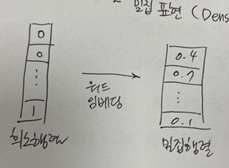

keras의 Embedding() 함수 

인공신경망에서 임베딩 layer를 만드는 역할을 한다. 임베딩 레이어를 통해 단어를 밀집 벡터로 표현한다. 사용형식은

Embedding(input_dim, output_dim, input_length)

input_dim : 입력 벡터 차원을 지정한다. 단어의 집합의 크기 즉, 최대 정수 인덱스 +1 이다.,
    output_dim : 출력 벡터 차원을 지정한다. 임베딩 후 벡터의 차원, 즉 크기를 지정한다.,
    input_length : 입력 시퀀스의 길이, 문장의 길이이다.

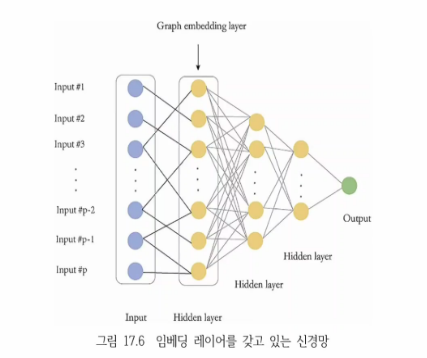

임베딩 레이어 다음 flatten 레이어는 임베딩 레이어의 결과인 2차원을 1차원으로 변환하여 Dense 레이어에 전달하는 역할을 하기 때문에 임베딩 레이어에서 input_length 를 지정해야한다.

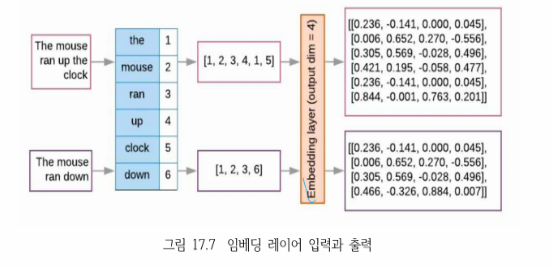

토큰의 개수가 다른 경우 토큰의 개수를 맞추기 위해 패딩 작업을 한다.
밑에 [1,2,3,6]은 위랑 토큰의 개수가 다르기 때문에 [0,0,1,2,3,6]으로 바꾸어서 임베딩을 한다.<br>
Embedding(6,4,6)이다.

텍스트에 대해 Embedding 함수를 사용하여 출력하는 경우는<br>
텍스트 -> 단어에 정수값 부여 -> Embedding()함수에 입력 -> 밀집 벡터 출력

In [3]:
text = [['Hope','to','see','you','soon'],['Nice','to','see','you','again']]
# 문장 토큰화와 단어 토큰화가 되어있다는 가정
text = [[0,1,2,3,4],[5,1,2,3,6]]
# 위의 데이터에 대해서 정수 인코딩을 수행하였다고 가정
# 다음과 같이 위의 데이터에 대해서 임베딩 층을 만들고 위의 데이터를 통과시킨다고 가정

from keras.layers import Embedding
Embedding(7,2,input_length = 5)
# 7은 단어의 개수, 즉 단어 집합의 크기이다.
# 2는 임베딩한 후의 벡터의 크기이다.
# 5는 각 입력 시퀀스의 길이 즉, input_length이다.
# 각각의 단어에 대해서 Embedding()이 리턴한 임베딩 벡터 또는 밀집 벡터의 예는 다음과 같다.

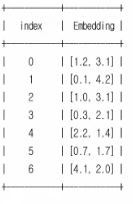

패딩<br>
임베딩 레이어에서 토큰의 길이가 다른 경우 사용함 , 0을 추가<br>

pad_sequence(sequences, maxlen=None) 

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'The mouse ran up the clock',
    'The mouse ran down'
]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)
padded = pad_sequences(sequences)
print(padded)

{'the': 1, 'mouse': 2, 'ran': 3, 'up': 4, 'clock': 5, 'down': 6}
[[1, 2, 3, 4, 1, 5], [1, 2, 3, 6]]
[[1 2 3 4 1 5]
 [0 0 1 2 3 6]]


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'I love my dog.',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100) # num_words 는 생략 가능
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)
padded = pad_sequences(sequences)
print(padded)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]
[[ 0  0  0  4  2  1  3]
 [ 0  0  0  4  2  1  6]
 [ 0  0  0  5  2  1  3]
 [ 7  5  8  1  3  9 10]]


#### (4) 텍스트를 읽고 긍정, 부정 예측하기

[코드 17-2] 영화리뷰가 긍정적인지 부정적인지 예측하기

임베딩 층을 갖고 있고, 은닉층이 없는 텍스트 분류 모형을 가지고 이진 분류 문제를 다루고자 한다. 활성화 함수로는 sigmoid 함수를 사용한다.

In [29]:
import numpy as np
import tensorflow as tf
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding

# 텍스트 리뷰 자료 저장
docs = ['너무 재밌네요','최고예요','참 감명 깊은 영화예요','추천하고 싶은 영화입니다.'
       ,'한번 더 보고싶네요','다시 보고싶어요','글쎄요','생각보다 지루하네요','연기가 어색해요',
       '재미없어요']
# 지도 학습 = > 정답이 주어진 상태로 학습시킴
# 긍정리뷰는 1 부정리뷰는 0으로 클래스 지정
classes = array([1,1,1,1,1,1,0,0,0,0])

#토큰화
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

x = token.texts_to_sequences(docs)
print(x)

#패딩, 서로 다른 길이의 데이터를 4로 맞추어 줍니다.
padded_x = pad_sequences(x,4)
print("\n패딩 결과:\n", padded_x)

#딥러닝 모델
print("\n딥러닝 모델 시작.")

#임베딩에 입력될 단어의 수를 지정한다.
word_size = len(token.word_index) + 1

#단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과를 출력합니다.
model = Sequential()
model.add(Embedding(word_size,8,input_length=4))
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))

model.summary()
# 이진 분류기 때문에 binary_crossentropy
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(padded_x, classes, epochs=20)
print("\n Accuracy: %.4f" % (model.evaluate(padded_x, classes)[1]))

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '감명': 5, '깊은': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '다시': 14, '보고싶어요': 15, '글쎄요': 16, '생각보다': 17, '지루하네요': 18, '연기가': 19, '어색해요': 20, '재미없어요': 21}
[[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14, 15], [16], [17, 18], [19, 20], [21]]

패딩 결과:
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0 14 15]
 [ 0  0  0 16]
 [ 0  0 17 18]
 [ 0  0 19 20]
 [ 0  0  0 21]]

딥러닝 모델 시작.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 4, 8)              176       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 209
T

[결과 해석]<br>
model.add(Embedding(word_size, 8, input_length=4)) 에 맞춰서 패딩 작업이 이루어짐
입력 벡터 차원 즉 word_size = 21+1, 출력벡터 차원 = 8, 입력 시퀀스의 길이 =4 이다. 따라서 찻번째 층에서 파라미터의 수는 22 * 8 = 176개이다. 두번째 층의 파라미터의 수는 32개이다. 여기에 한 개의 노드를 갖고 있는 dense layer가 추가된다. 따라서 33개이다.

[코드 17-2] 감성분석에서 예측하기

In [40]:
import numpy as np
import tensorflow as tf
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding

# 텍스트 리뷰 자료 저장
docs = ['Well done!','Good work','Great effort', 'nice work','Excellent!',
       'Weak','Poor effort!','not good','poor work','Could have done better']
# 지도 학습 = > 정답이 주어진 상태로 학습시킴
# 긍정리뷰는 1 부정리뷰는 0으로 클래스 지정
labels = array([1,1,1,1,1,1,0,0,0,0])

#토큰화
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

x = token.texts_to_sequences(docs)
print(x)

#패딩, 서로 다른 길이의 데이터를 4로 맞추어 줍니다.
padded_x = pad_sequences(x,4)
print("\n패딩 결과:\n", padded_x)

#딥러닝 모델
print("\n딥러닝 모델 시작.")

#임베딩에 입력될 단어의 수를 지정한다.
word_size = len(token.word_index) + 1

#단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과를 출력합니다.
model = Sequential()
model.add(Embedding(word_size,8,input_length=4))
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))

# 이진 분류기 때문에 binary_crossentropy
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

# fit the model
model.fit(padded_x, labels, epochs=50, verbose=0)
#evaluae the model
loss, accuracy = model.evaluate(padded_x, labels, verbose=0)
print(" Accuracy: %f" % (accuracy*100))

# 임베딩 레이어로 텍스트를 처리한 다음에 나머지는 딥러닝 구조랑 동일

{'work': 1, 'done': 2, 'good': 3, 'effort': 4, 'poor': 5, 'well': 6, 'great': 7, 'nice': 8, 'excellent': 9, 'weak': 10, 'not': 11, 'could': 12, 'have': 13, 'better': 14}
[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]

패딩 결과:
 [[ 0  0  6  2]
 [ 0  0  3  1]
 [ 0  0  7  4]
 [ 0  0  8  1]
 [ 0  0  0  9]
 [ 0  0  0 10]
 [ 0  0  5  4]
 [ 0  0 11  3]
 [ 0  0  5  1]
 [12 13  2 14]]

딥러닝 모델 시작.
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 4, 8)              120       
_________________________________________________________________
flatten_7 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 153
Trainable params: 153
Non-trainable params: 0
_______________________